In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [172]:
df = pd.read_csv('dataset/worldbank/API.csv')
meta_country = pd.read_csv('dataset/worldbank/Metadata_Country_API_19_DS2_en_csv_v2_3159902.csv')
meta_indicator = pd.read_csv('dataset/worldbank/Metadata_Indicator_API_19_DS2_en_csv_v2_3159902.csv')

In [173]:
meta_country

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [174]:
meta_indicator

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),Urban population refers to people living in ur...,United Nations Population Division. World Urba...,NaN
1,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank staff estimates based on the United...,NaN
2,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank staff estimates based on the United...,NaN
3,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,NaN
4,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Derived from total population. Population sour...,NaN
...,...,...,...,...,...
71,AG.LND.EL5M.RU.ZS,Rural land area where elevation is below 5 met...,Rural land area below 5m is the percentage of ...,Center for International Earth Science Informa...,NaN
72,AG.LND.EL5M.RU.K2,Rural land area where elevation is below 5 met...,Rural land area below 5m is the total rural la...,Center for International Earth Science Informa...,NaN
73,AG.LND.ARBL.ZS,Arable land (% of land area),Arable land includes land defined by the FAO a...,"Food and Agriculture Organization, electronic ...",NaN
74,AG.LND.AGRI.ZS,Agricultural land (% of land area),Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ...",NaN


## Dataset Overview

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216 entries, 0 to 20215
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    20216 non-null  object 
 1   Country Code    20216 non-null  object 
 2   Indicator Name  20216 non-null  object 
 3   Indicator Code  20216 non-null  object 
 4   1960            3133 non-null   float64
 5   1961            4538 non-null   float64
 6   1962            4721 non-null   float64
 7   1963            4581 non-null   float64
 8   1964            4639 non-null   float64
 9   1965            4676 non-null   float64
 10  1966            4688 non-null   float64
 11  1967            4857 non-null   float64
 12  1968            4709 non-null   float64
 13  1969            4716 non-null   float64
 14  1970            5984 non-null   float64
 15  1971            7333 non-null   float64
 16  1972            7541 non-null   float64
 17  1973            7354 non-null  

In [176]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,3.133000e+03,4.538000e+03,4.721000e+03,4.581000e+03,4.639000e+03,4.676000e+03,4.688000e+03,4.857000e+03,4.709000e+03,4.716000e+03,...,1.183800e+04,1.231900e+04,1.081500e+04,1.080100e+04,1.004800e+04,9.138000e+03,8.053000e+03,7.412000e+03,3.661000e+03,2.471000e+03
mean,2.020445e+07,1.479493e+07,1.490789e+07,1.644225e+07,1.690121e+07,1.754138e+07,1.966332e+07,1.972785e+07,2.184618e+07,2.305864e+07,...,6.310504e+08,7.159371e+08,9.751320e+08,1.111048e+09,1.377183e+09,1.352288e+07,1.554424e+07,1.714633e+07,3.484397e+07,5.237699e+07
std,1.768701e+08,1.581155e+08,1.644381e+08,1.828137e+08,1.898935e+08,2.000727e+08,2.377882e+08,2.435295e+08,2.728347e+08,2.929800e+08,...,1.598990e+10,1.834583e+10,2.309879e+10,2.604765e+10,3.091035e+10,1.893776e+08,2.044682e+08,2.159453e+08,3.103152e+08,3.813804e+08
min,-3.667000e+00,-3.667000e+00,-3.667000e+00,-3.703670e+02,-3.667000e+00,-1.450543e+00,-3.667000e+00,-2.011787e+00,-7.260660e+02,-1.892842e+00,...,-7.062298e+05,-4.854332e+05,-4.542582e+05,-6.116137e+05,-6.381096e+05,-7.114856e+05,-2.830723e+01,-1.275190e+03,-1.860016e+01,-1.720565e+00
25%,1.651393e+00,2.717960e+00,2.881118e+00,2.720452e+00,2.649943e+00,2.652144e+00,2.679898e+00,2.842775e+00,2.714277e+00,2.719975e+00,...,1.638896e+00,1.639613e+00,1.800138e+00,1.882970e+00,1.852572e+00,1.985291e+00,2.176847e+00,2.057450e+00,2.857474e+00,2.809923e+00
50%,4.163212e+01,3.036830e+01,3.558600e+01,3.104739e+01,3.135300e+01,3.102728e+01,3.137748e+01,3.653000e+01,3.170570e+01,3.266401e+01,...,2.872923e+01,2.968126e+01,3.082758e+01,3.088500e+01,2.861185e+01,2.718346e+01,2.305038e+01,2.299730e+01,3.216984e+01,3.540044e+01
75%,6.791284e+03,1.771161e+03,1.791461e+03,1.842800e+03,1.847991e+03,1.897191e+03,1.972850e+03,1.952200e+03,2.147145e+03,2.317683e+03,...,7.405562e+02,8.000000e+02,1.820014e+03,1.853100e+03,2.058079e+03,2.318408e+03,1.292000e+03,2.035348e+03,1.000000e+02,4.263420e+04
max,3.040000e+09,3.428000e+09,3.797000e+09,4.362000e+09,4.653000e+09,4.998000e+09,6.127000e+09,6.387000e+09,7.203000e+09,7.830000e+09,...,9.115840e+11,1.067910e+12,1.267130e+12,1.435700e+12,1.644540e+12,7.424485e+09,7.509410e+09,7.592476e+09,7.673345e+09,7.752841e+09


## Missing value identification

In [177]:
# function to count missing value
def get_nan(df, sort=False):
    missing_value = df[df.isna().values.any(axis=1)]
    rows = missing_value.shape[0]
    print(rows, "rows with missing values")
    
    if rows < 0:
        return 0
    if sort:
        print(df.isna().sum().sort_values())
    else:
        print(df.isna().sum())
        

In [178]:
get_nan(df, sort=True)

19225 rows with missing values
Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
2010               6145
                  ...  
1963              15635
1961              15678
2019              16555
1960              17083
2020              17745
Length: 65, dtype: int64


In [179]:
# function to visualize the proportion of missing value
def visual_nan(df, name="", isSorted=False, savePlot=True):
    
    sort = ''
    if isSorted:
        df=df[df.isna().sum().sort_values().keys()]
        sort = '_sorted'
    missing_value = df.isna().melt(value_name="missing")

    ax = sns.displot(data=missing_value,
                     y="variable",
                     hue="missing",
                     multiple="fill",
                     height=10,
                     aspect=1.5)
    plt.xlabel("Proportion of missing value")
    plt.title(f"Missing values of {name}")
    
    if savePlot:
        filename = name.split('.')
        plt.savefig(f"plot/{filename[0]}{sort}.png")

    return ax

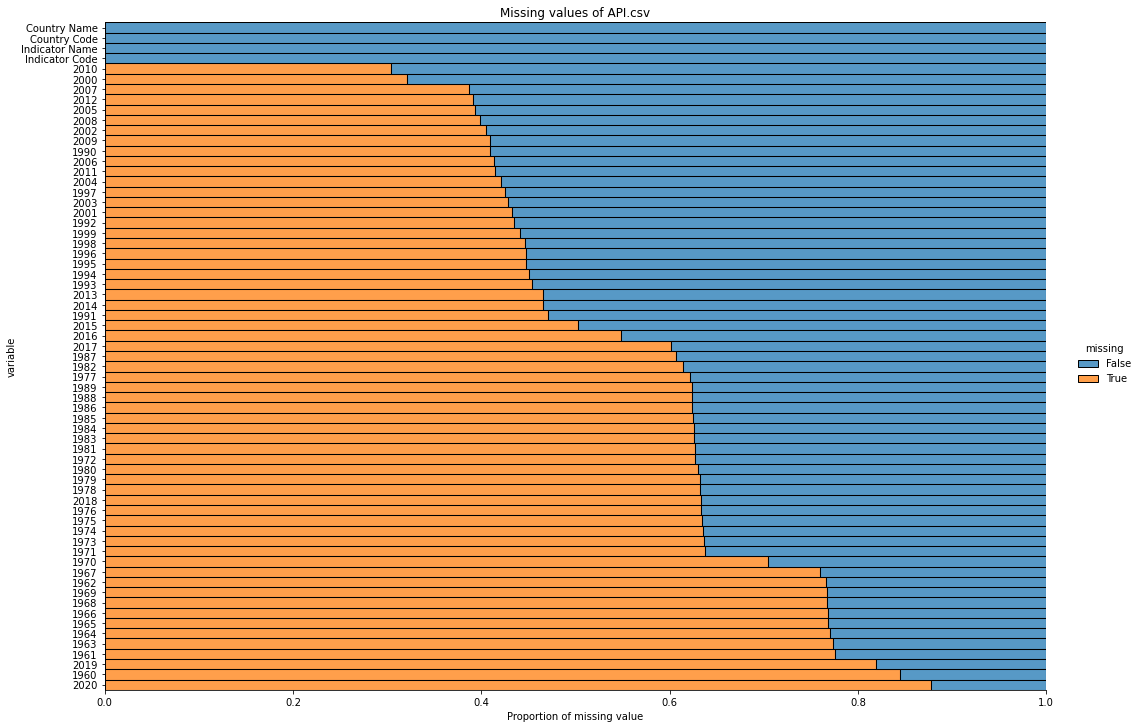

In [180]:
visual_nan(df, 'API.csv', True)

In [181]:
missing = pd.DataFrame(df.isna().sum(), columns=['missing'])
missing.reset_index(inplace=True)
missing.rename(columns={'index':'col'}, inplace=True)
missing['ratio'] = (missing['missing']/25204*100).round(2)

missing.sort_values(by=['ratio'])

,col,missing,ratio
0,Country Name,0,0.00
1,Country Code,0,0.00
2,Indicator Name,0,0.00
3,Indicator Code,0,0.00
54,2010,6145,24.38
...,...,...,...
7,1963,15635,62.03
5,1961,15678,62.20
63,2019,16555,65.68
4,1960,17083,67.78


<AxesSubplot:>

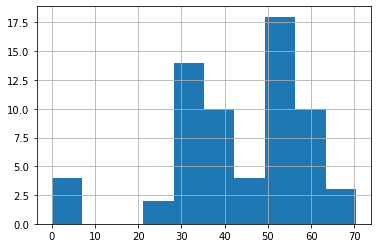

In [182]:
missing.ratio.hist(bins=10)

In [183]:
unique_countries = df['Country Name'].unique()
print(unique_countries)
print(len(unique_countries))

['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)'

In [184]:
unique_country_codes = df['Country Code'].unique()
print(unique_country_codes)
print(len(unique_country_codes))

['ABW' 'AFE' 'AFG' 'AFW' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS'
 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN'
 'CEB' 'CHE' 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV'
 'CRI' 'CSS' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM'
 'DZA' 'EAP' 'EAR' 'EAS' 'ECA' 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST'
 'ETH' 'EUU' 'FCS' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA'
 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC'
 'HKG' 'HND' 'HPC' 'HRV' 'HTI' 'HUN' 'IBD' 'IBT' 'IDA' 'IDB' 'IDN' 'IDX'
 'IMN' 'IND' 'INX' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN'
 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LCN' 'LDC' 'LIC' 'LIE' 'LKA' 'LMC' 'LMY' 'LSO' 'LTE' 'LTU'
 'LUX' 'LVA' 'MAC' 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL'
 'MIC' 'MKD' 'MLI' 'MLT' 'MMR' 'MNA' 'MNE' 'MNG' 'M

In [185]:
unique_indicator_names = df['Indicator Name'].unique()
print(unique_indicator_names)
print(len(unique_indicator_names))

['Urban population (% of total population)' 'Urban population'
 'Urban population growth (annual %)' 'Population, total'
 'Population growth (annual %)'
 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'
 'Prevalence of underweight, weight for age (% of children under 5)'
 'Community health workers (per 1,000 people)'
 'Mortality rate, under-5 (per 1,000 live births)'
 'Primary completion rate, total (% of relevant age group)'
 'School enrollment, primary and secondary (gross), gender parity index (GPI)'
 'Agriculture, forestry, and fishing, value added (% of GDP)'
 'CPIA public sector management and institutions cluster average (1=low to 6=high)'
 'Ease of doing business rank (1=most business-friendly regulations)'
 'Terrestrial and marine protected areas (% of total territorial area)'
 'Marine protected areas (% of territorial waters)'
 'Terrestrial protected areas (% of total land area)'
 'Annual freshwater withdrawals, total (% of internal resources)'
 'Annual f

In [186]:
unique_indicator_codes = df['Indicator Code'].unique()
print(unique_indicator_codes)
print(len(unique_indicator_codes))

['SP.URB.TOTL.IN.ZS' 'SP.URB.TOTL' 'SP.URB.GROW' 'SP.POP.TOTL'
 'SP.POP.GROW' 'SI.POV.DDAY' 'SH.STA.MALN.ZS' 'SH.MED.CMHW.P3'
 'SH.DYN.MORT' 'SE.PRM.CMPT.ZS' 'SE.ENR.PRSC.FM.ZS' 'NV.AGR.TOTL.ZS'
 'IQ.CPA.PUBS.XQ' 'IC.BUS.EASE.XQ' 'ER.PTD.TOTL.ZS' 'ER.MRN.PTMR.ZS'
 'ER.LND.PTLD.ZS' 'ER.H2O.FWTL.ZS' 'ER.H2O.FWTL.K3' 'EN.URB.MCTY.TL.ZS'
 'EN.POP.EL5M.ZS' 'EN.POP.EL5M.UR.ZS' 'EN.POP.EL5M.RU.ZS' 'EN.CLC.MDAT.ZS'
 'EN.CLC.GHGR.MT.CE' 'EN.CLC.DRSK.XQ' 'EN.ATM.SF6G.KT.CE'
 'EN.ATM.PFCG.KT.CE' 'EN.ATM.NOXE.ZG' 'EN.ATM.NOXE.KT.CE' 'EN.ATM.METH.ZG'
 'EN.ATM.METH.KT.CE' 'EN.ATM.HFCG.KT.CE' 'EN.ATM.GHGT.ZG'
 'EN.ATM.GHGT.KT.CE' 'EN.ATM.GHGO.ZG' 'EN.ATM.GHGO.KT.CE'
 'EN.ATM.CO2E.SF.ZS' 'EN.ATM.CO2E.SF.KT' 'EN.ATM.CO2E.PP.GD.KD'
 'EN.ATM.CO2E.PP.GD' 'EN.ATM.CO2E.PC' 'EN.ATM.CO2E.LF.ZS'
 'EN.ATM.CO2E.LF.KT' 'EN.ATM.CO2E.KT' 'EN.ATM.CO2E.KD.GD'
 'EN.ATM.CO2E.GF.ZS' 'EN.ATM.CO2E.GF.KT' 'EN.ATM.CO2E.EG.ZS'
 'EG.USE.PCAP.KG.OE' 'EG.USE.ELEC.KH.PC' 'EG.USE.COMM.GD.PP.KD'
 'EG.FEC.RNEW.ZS' 'EG.ELC.RNWX.ZS' 

In [187]:
px.histogram(df, x="Country Name")

In [188]:
px.histogram(df, x="Country Code")

In [189]:
px.histogram(df, x="Indicator Name")

In [190]:
px.histogram(df, x="Indicator Code")

## Top countries that produce the most Carbon Dioxide 

China, US, India

In [191]:
def get_country_data(df, country_name, keep_indicator_code=False):
    df_country = df[df['Country Name'] == country_name].copy()
    if len(df_country) == 0:
        return 0 # country name does not exist

    if keep_indicator_code:
        header_to_keep = 'Indicator Code'
        header_to_drop = 'Indicator Name'

    else:
        header_to_keep = 'Indicator Name'
        header_to_drop = 'Indicator Code'
        
    df_country.drop(columns=['Country Name', 'Country Code', f'{header_to_drop}'], inplace=True)
    df_country.reset_index(inplace=True, drop=True)
    df_country.set_index(f'{header_to_keep}')  
    df_country = df_country.transpose()
    df_country.reset_index(inplace=True)
    
    new_header = df_country.iloc[0] # grab the first row for the header
    df_country = df_country[1:] # take the data but not header
    df_country.columns = new_header # set the header row as the df header
    df_country.rename(columns={f'{header_to_keep}': 'Year'}, inplace=True)
    
    # reset column type to float
    headers = df_country.columns.tolist()[1:] # all headers except 'Year'
    for h in headers:
        df_country[h] = df_country[h].apply(pd.to_numeric, errors='coerce')
    
    return df_country

In [192]:
df_china = get_country_data(df, "China", True)
df_china

,Country Name,China,China,China,China,China,China,China,China,China,...,China,China,China,China,China,China,China,China,China,China
1,Country Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indicator Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960,16.203,108085352.0,NaN,6.670700e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1961,16.708,110327936.0,2.053596,6.603300e+08,-1.015528,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.970853,36.420045,3432480.0
5,1962,17.226,114685540.0,3.873678,6.657700e+08,0.820456,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.939340,36.712150,3460010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2016,56.736,782199374.0,2.744069,1.378665e+09,0.541479,0.5,NaN,NaN,9.9,...,22.542877,2124598.67,NaN,NaN,NaN,NaN,NaN,12.680817,56.081665,5285529.0
60,2017,57.960,803554542.0,2.693540,1.386395e+09,0.559121,NaN,NaN,NaN,9.2,...,22.742310,2143394.70,NaN,NaN,NaN,NaN,NaN,12.678503,56.079351,5285311.0
61,2018,59.152,823827650.0,2.491628,1.392730e+09,0.455900,NaN,NaN,NaN,8.5,...,22.941735,2162190.40,NaN,NaN,NaN,NaN,NaN,12.678246,56.079083,5285287.0
62,2019,60.308,842933962.0,2.292727,1.397715e+09,0.357291,NaN,NaN,NaN,7.9,...,23.141166,2180986.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
def missing_ratio_summary(df):
    missing = pd.DataFrame(df.isna().sum(), columns=['missing'])
    missing.reset_index(inplace=True)
    missing.rename(columns={0:'col'}, inplace=True)
    missing['ratio'] = (missing['missing']/len(df)*100).round(2)

    display(missing.sort_values(by=['ratio']))

In [194]:
df_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 1 to 63
Data columns (total 77 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  63 non-null     object 
 1   China         61 non-null     float64
 2   China         61 non-null     float64
 3   China         60 non-null     float64
 4   China         61 non-null     float64
 5   China         60 non-null     float64
 6   China         14 non-null     float64
 7   China         12 non-null     float64
 8   China         17 non-null     float64
 9   China         51 non-null     float64
 10  China         13 non-null     float64
 11  China         38 non-null     float64
 12  China         61 non-null     float64
 13  China         0 non-null      float64
 14  China         1 non-null      float64
 15  China         3 non-null      float64
 16  China         3 non-null      float64
 17  China         3 non-null      float64
 18  China         8 non-null      fl

In [195]:
df_china.describe()

,China,China,China,China,China,China,China,China,China,China,...,China,China,China,China,China,China,China,China,China,China
count,61.000000,6.100000e+01,60.000000,6.100000e+01,60.000000,14.000000,12.000000,17.000000,51.000000,13.000000,...,31.000000,3.100000e+01,3.00000,3.000000,3.00000,3.000000,3.0000,58.000000,58.000000,5.800000e+01
mean,31.305885,3.718762e+08,3.459182,1.093021e+09,1.238067,21.442857,7.900000,0.829529,47.105882,98.008264,...,20.025744,1.887366e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,11.958757,49.548769,4.669819e+06
std,14.445617,2.352856e+08,1.113383,2.339958e+08,0.795454,22.087195,5.115396,0.252355,29.126135,4.332233,...,2.076112,1.956683e+05,0.00000,0.000000,0.00000,0.000000,0.0000,1.095429,7.211373,6.796502e+05
min,16.203000,1.080854e+08,1.210543,6.603300e+08,-1.015528,0.500000,2.400000,0.084000,7.900000,90.640839,...,16.673325,1.571406e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,10.286715,36.420045,3.432480e+06
25%,17.900000,1.594527e+08,2.465975,9.163950e+08,0.558935,3.050000,3.700000,0.702000,21.000000,93.347893,...,18.253671,1.720356e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,10.783977,42.771814,4.031111e+06
50%,26.442000,3.001656e+08,3.661990,1.135185e+09,1.187578,13.050000,6.850000,0.830000,49.200000,99.276939,...,20.033048,1.888055e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,12.696478,53.422560,5.034900e+06
75%,42.522000,5.543678e+08,4.312367,1.303720e+09,1.561405,38.150000,11.175000,1.051000,58.400000,101.101723,...,21.799345,2.054523e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,12.838008,55.804949,5.259449e+06
max,61.428000,8.612894e+08,5.493641,1.402112e+09,2.787332,66.300000,18.700000,1.078000,117.600000,103.513619,...,23.340596,2.199782e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,13.320891,56.133200,5.290386e+06


In [196]:
missing_ratio_summary(df_china)

,col,missing,ratio
0,Country Name,0,0.00
1,China,2,3.17
2,China,2,3.17
4,China,2,3.17
12,China,2,3.17
...,...,...,...
14,China,62,98.41
25,China,62,98.41
24,China,62,98.41
13,China,63,100.00


In [197]:
df_china.describe()

,China,China,China,China,China,China,China,China,China,China,...,China,China,China,China,China,China,China,China,China,China
count,61.000000,6.100000e+01,60.000000,6.100000e+01,60.000000,14.000000,12.000000,17.000000,51.000000,13.000000,...,31.000000,3.100000e+01,3.00000,3.000000,3.00000,3.000000,3.0000,58.000000,58.000000,5.800000e+01
mean,31.305885,3.718762e+08,3.459182,1.093021e+09,1.238067,21.442857,7.900000,0.829529,47.105882,98.008264,...,20.025744,1.887366e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,11.958757,49.548769,4.669819e+06
std,14.445617,2.352856e+08,1.113383,2.339958e+08,0.795454,22.087195,5.115396,0.252355,29.126135,4.332233,...,2.076112,1.956683e+05,0.00000,0.000000,0.00000,0.000000,0.0000,1.095429,7.211373,6.796502e+05
min,16.203000,1.080854e+08,1.210543,6.603300e+08,-1.015528,0.500000,2.400000,0.084000,7.900000,90.640839,...,16.673325,1.571406e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,10.286715,36.420045,3.432480e+06
25%,17.900000,1.594527e+08,2.465975,9.163950e+08,0.558935,3.050000,3.700000,0.702000,21.000000,93.347893,...,18.253671,1.720356e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,10.783977,42.771814,4.031111e+06
50%,26.442000,3.001656e+08,3.661990,1.135185e+09,1.187578,13.050000,6.850000,0.830000,49.200000,99.276939,...,20.033048,1.888055e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,12.696478,53.422560,5.034900e+06
75%,42.522000,5.543678e+08,4.312367,1.303720e+09,1.561405,38.150000,11.175000,1.051000,58.400000,101.101723,...,21.799345,2.054523e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,12.838008,55.804949,5.259449e+06
max,61.428000,8.612894e+08,5.493641,1.402112e+09,2.787332,66.300000,18.700000,1.078000,117.600000,103.513619,...,23.340596,2.199782e+06,1.16588,0.258707,23928.50781,0.907172,83906.6875,13.320891,56.133200,5.290386e+06


In [198]:
missing_ratio_summary(df_china)

,col,missing,ratio
0,Country Name,0,0.00
1,China,2,3.17
2,China,2,3.17
4,China,2,3.17
12,China,2,3.17
...,...,...,...
14,China,62,98.41
25,China,62,98.41
24,China,62,98.41
13,China,63,100.00


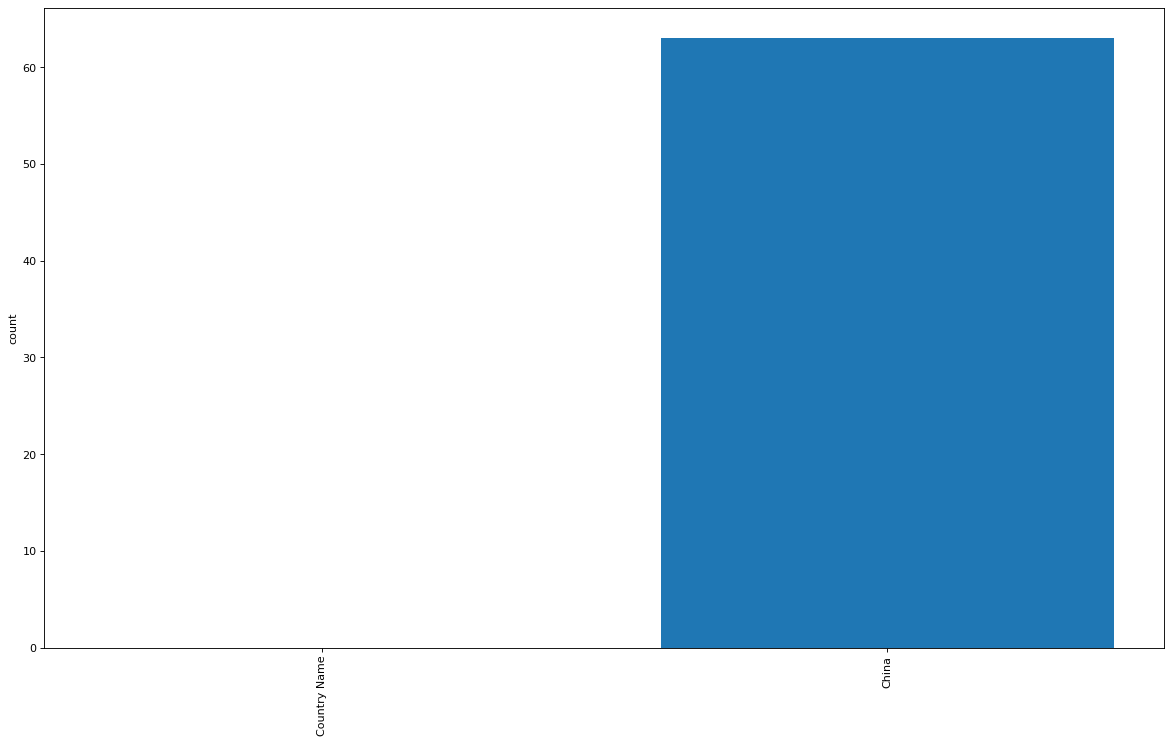

In [199]:
null_china = df_china.isna().sum()

# create figure
fig = plt.figure(figsize=(14, 8), dpi=80)
ax = fig.add_axes([0,0,1,1])
# set Y axis label
ax.set_ylabel('count')
# set orientation for X axis labels
plt.xticks(rotation='vertical')
# draw bar chart
ax.bar(df_china.columns, null_china)
plt.show()

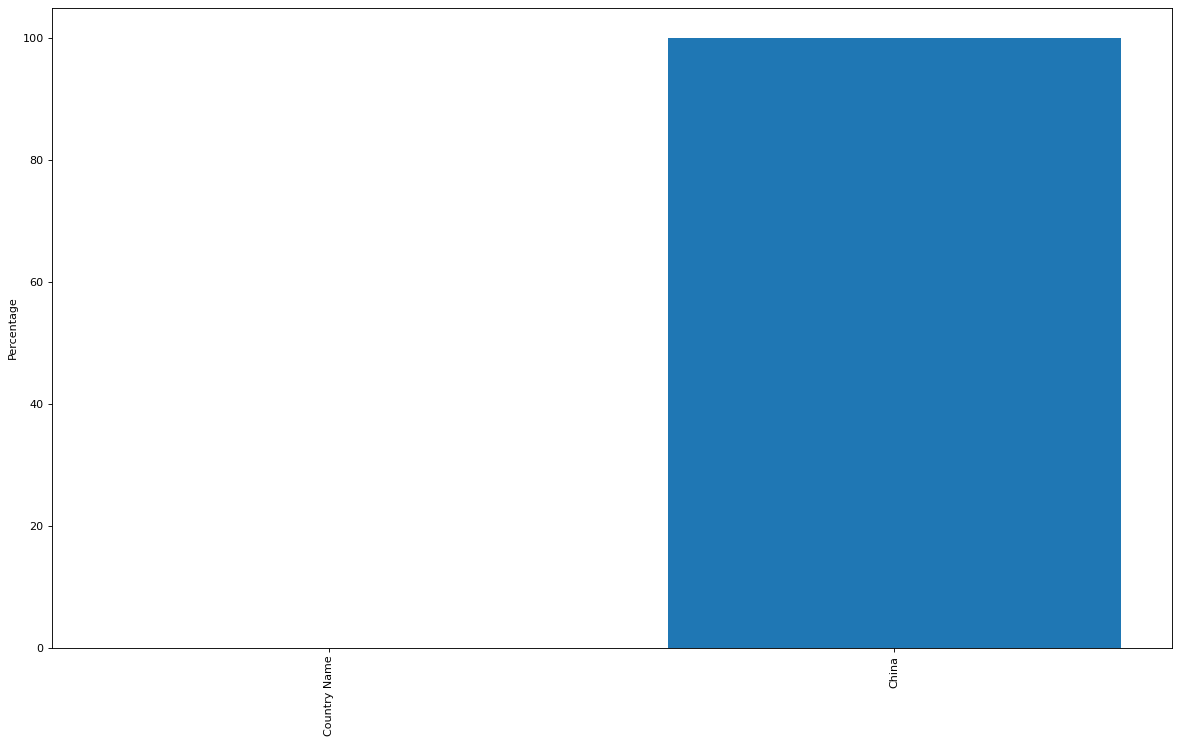

In [200]:
china_percent_missing = df_china.isnull().sum() * 100 / len(df_china)
china_missing_value_df = pd.DataFrame({'column_name': df_china.columns,
                                 'percent_missing': china_percent_missing})

china_missing_value_df.sort_values('percent_missing', inplace=True)
percent_missing = df_china.isnull().sum() * 100 / len(df_china)

# create figure
fig = plt.figure(figsize=(14, 8), dpi=80)
ax = fig.add_axes([0,0,1,1])
# set Y axis label
ax.set_ylabel('Percentage')
# set orientation for X axis labels
plt.xticks(rotation='vertical')
# draw bar chart
ax.bar(df_china.columns, china_percent_missing)
plt.show()

In [201]:
china_percent_missing

0
Country Name     0.000000
China            3.174603
China            3.174603
China            4.761905
China            3.174603
                  ...    
China           95.238095
China           95.238095
China            7.936508
China            7.936508
China            7.936508
Length: 77, dtype: float64

In [202]:
df_us = get_country_data(df, "United States", True)
df_us

,Country Name,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
1,Country Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indicator Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960,69.996,126462473.0,NaN,180671000.0,NaN,NaN,NaN,NaN,30.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1961,70.377,129276215.0,2.200571,183691000.0,1.657730,NaN,NaN,NaN,29.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.721671,48.860242,4475090.000
5,1962,70.757,131988693.0,2.076494,186538000.0,1.537997,NaN,NaN,NaN,28.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.335711,48.476137,4439910.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2016,81.862,264473000.0,0.958268,323071755.0,0.724676,1.0,1.4,NaN,6.7,...,33.899723,3100950.0,NaN,NaN,NaN,NaN,NaN,17.184190,44.303705,4052646.000
60,2017,82.058,266788716.0,0.871785,325122128.0,0.632644,1.2,NaN,NaN,6.7,...,33.866926,3097950.0,NaN,NaN,NaN,NaN,NaN,17.243857,44.363367,4058103.538
61,2018,82.256,268844029.0,0.767437,326838199.0,0.526435,1.0,0.4,NaN,6.6,...,33.866926,3097950.0,NaN,NaN,NaN,NaN,NaN,17.243857,44.363367,4058103.538
62,2019,82.459,270737596.0,0.701868,328329953.0,0.455381,NaN,NaN,NaN,6.5,...,33.866926,3097950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
missing_ratio_summary(df_us)

,col,missing,ratio
0,Country Name,0,0.00
1,United States,2,3.17
2,United States,2,3.17
4,United States,2,3.17
20,United States,2,3.17
...,...,...,...
14,United States,62,98.41
26,United States,62,98.41
24,United States,62,98.41
13,United States,63,100.00


In [204]:
df_india = get_country_data(df, "India", True)
df_india

,Country Name,India,India,India,India,India,India,India,India,India,...,India,India,India,India,India,India,India,India,India,India
1,Country Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indicator Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960,17.924,80756165.0,NaN,4.505477e+08,NaN,NaN,NaN,NaN,241.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1961,18.032,82882675.0,2.599175,4.596422e+08,1.998439,NaN,NaN,NaN,238.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.403647,58.843195,1749520.0
5,1962,18.218,85456483.0,3.058122,4.690772e+08,2.031905,NaN,NaN,NaN,234.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.704334,59.357794,1764820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2016,33.182,439501314.0,2.318510,1.324517e+09,1.090459,NaN,NaN,0.581,40.9,...,23.911825,710944.0,NaN,NaN,NaN,NaN,NaN,52.608814,60.431389,1796740.0
60,2017,33.600,449795398.0,2.315210,1.338677e+09,1.063359,NaN,33.4,NaN,38.5,...,24.001426,713608.0,NaN,NaN,NaN,NaN,NaN,52.608814,60.431389,1796740.0
61,2018,34.030,460304169.0,2.309470,1.352642e+09,1.037828,NaN,NaN,NaN,36.3,...,24.091027,716272.0,NaN,NaN,NaN,NaN,NaN,52.608814,60.431389,1796740.0
62,2019,34.472,471031529.0,2.303752,1.366418e+09,1.013261,NaN,NaN,NaN,34.3,...,24.180628,718936.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
missing_ratio_summary(df_us)

,col,missing,ratio
0,Country Name,0,0.00
1,United States,2,3.17
2,United States,2,3.17
4,United States,2,3.17
20,United States,2,3.17
...,...,...,...
14,United States,62,98.41
26,United States,62,98.41
24,United States,62,98.41
13,United States,63,100.00


### Drop Columns with Missing Values > 70%

In [206]:
perc = 70.0
min_count =  int(((100-perc)/100)*df_china.shape[0] + 1)
df_china = df_china.dropna( axis=1, 
                thresh=min_count)
min_count =  int(((100-perc)/100)*df_us.shape[0] + 1)
df_us = df_us.dropna( axis=1, 
                thresh=min_count)
min_count =  int(((100-perc)/100)*df_india.shape[0] + 1)
df_india = df_india.dropna( axis=1, 
                thresh=min_count)

In [207]:
df_china.head()

,Country Name,China,China,China,China,China,China,China,China,China,...,China,China,China,China,China,China,China,China,China,China
1,Country Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indicator Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960,16.203,108085352.0,NaN,667070000.0,NaN,NaN,NaN,23.175294,8.122740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1961,16.708,110327936.0,2.053596,660330000.0,-1.015528,NaN,NaN,35.794855,8.440786,...,NaN,NaN,NaN,NaN,1211.0,NaN,NaN,10.970853,36.420045,3432480.0
5,1962,17.226,114685540.0,3.873678,665770000.0,0.820456,NaN,NaN,38.986405,8.528797,...,NaN,NaN,NaN,NaN,1341.6,NaN,NaN,10.939340,36.712150,3460010.0


### Dataframe Intersection

In [208]:
from functools import reduce
common_cols = reduce(np.intersect1d,(df_china.columns, df_us.columns, df_india.columns))

In [209]:
common_cols

array(['Country Name'], dtype=object)

### Multivariate Imputation

Next, we will be using multivariate imputation to fill up missing values

In [210]:
print(df_china.shape)
print(df_us.shape)
print(df_india.shape)

(63, 50)
(63, 52)
(63, 51)


In [211]:
print(df_china.shape[0] *0.8)
print(df_us.shape[0] *0.8)
print(df_india.shape[0] *0.8)

50.400000000000006
50.400000000000006
50.400000000000006


In [212]:
def multivariate_imputation(df):

    df_train = df.iloc[:-25] 
    df_test = df[-25:] # last 25 years

    print(f'Training years: {df_train.shape[0]}')
    print(f'Test years: {df_test.shape[0]}')

    imp = IterativeImputer(max_iter=10, random_state=2022)
    imp.fit(df_train.iloc[:,3:]) 

    df_predict_array = imp.transform(df_test.iloc[:,3:])

    columns = df.columns.tolist()[3:]
    df_predict = pd.DataFrame(df_predict_array, columns=columns) # array to df

    df_predict['iso_code'] = df['iso_code']
    df_predict['country'] = df['country']
    df_predict['year'] = df_test['year'].to_list() # predicted years

    df_predict = df_predict.reindex(columns=df_test.columns.tolist())
    return df_predict